In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
%matplotlib inline

In [2]:
data1 = pd.read_csv('https://raw.githubusercontent.com/zhukpm/da_spring2020/master/data/lw3/projects/1032169280/sample1.csv', header=None)
x = data1[0]
data1.head()

,0
0,687
1,581
2,563
3,644
4,686


In [3]:
data2 = pd.read_csv('https://raw.githubusercontent.com/zhukpm/da_spring2020/master/data/lw3/projects/1032169280/sample2.csv', header=None)
y = data2[0]
data2.head()

,0
0,555
1,598
2,651
3,639
4,581


In [4]:
x.name, y.name = 'набор данных 1', 'набор данных 2'

In [5]:
def two_histograms(x, y):
    """
    Функция, которая построит 2 гистограммы на одной картинке.
    Дополнительно пунктирными линиями указывается средние значения выборки.
     x, y: вектор pd.Series
    """ 
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

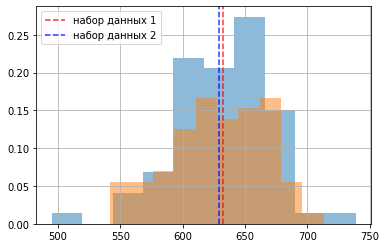

In [6]:
two_histograms(x, y)

In [7]:
stat, p = shapiro(data1)
print('Statistics = %.3f, p = %.3f'%(stat, p))
alpha = 0.05
if p > alpha/2:
    print('Stay in H0')
else:
    print('Reject H0')

Statistics = 0.974, p = 0.137
Stay in H0


In [8]:
stat, p = shapiro(data2)
print('Statistics = %.3f, p = %.3f'%(stat, p))
if p > alpha/2:
    print('Stay in H0')
else:
    print('Reject H0')

Statistics = 0.981, p = 0.344
Stay in H0


Критерий Фишера

In [9]:
print(y.mean(), x.mean())
print(y.var(), x.var())

629.1111111111111 632.1917808219179
1413.7621283255082 1495.4071537290708


In [10]:
F = stats.tvar(x) / stats.tvar(y)
F

1.057750185669682

In [39]:
p_value = 1 - stats.f.cdf(F, len(x) - 1, len(y) - 1)
p_value

0.40673442511073143

In [40]:
if p_value > alpha/2:
    print('Stay in H0')
else:
    print('Reject H0')

Stay in H0


### Поскольку дисперсии равны и обе выборки имеют нормальное распределение, для проверки гипотезы о смещении мы можем воспользоваться критерием Стьюдента

Критерий Стьюдента

In [13]:
print(stats.ttest_ind(x, y)) # H3 y_mean <> x_mean
y.mean(), x.mean()

Ttest_indResult(statistic=0.4862691351368066, pvalue=0.6275207262084103)


(629.1111111111111, 632.1917808219179)

In [16]:
m = x.size
n = y.size
N = m + n
x_mean = x.mean()
y_mean = y.mean()
s1, s2 = 0, 0
for x_i in x:
    s1 += (x_i - x_mean) ** 2
for y_i in y:
    s2 += (y_i - y_mean) ** 2
s_n = np.sqrt((s1 + s2) / (N - 2))
T = (y_mean - x_mean) / (s_n * np.sqrt(1 / n + 1 / m))
p_value = 2 * (1 - stats.t.cdf(np.abs(T), N - 2))
T, p_value

(-0.48626913513680664, 0.6275207262084104)

In [17]:
if p_value > alpha/2:
    print('Stay in H0')
else:
    print('Reject H0')

Stay in H0
